# How Does College Academic and Athletic Spending Impact Retention Rates?

![img](Images/Austin_Stadium.jpeg)

# Overview & Business Understanding

Retention rates are one of the most important student success metrics used by colleges in the US. Even a brief search on websites like [Inside Higher Ed](https://www.insidehighered.com/) or [The Chronicle of Higher Education](https://www.chronicle.com/) will return a number of articles describing the importance of retention rates and strategies for departments to increase student retention. Given that graduation is one of the primary goals of attending college, retention rates can be thought of as an early indicator of what graduation rates will be later down the road. Given the importance of retention rates, this project seeks to understand the relationship between retention rates and college spending patterns in both academics and athletics. The hope is that if there are patterns between spending and retention rates, that colleges can use that information to redirect funds to increase student retention.

[According to the National Center for Education Statistics (NCES)](https://nces.ed.gov/programs/coe/indicator/ctr), "Retention rates measure the percentage of first-time undergraduate students who return to the same institution the following fall, and graduation rates measure the percentage of first-time, full-time undergraduate students who complete their program at the same institution within a specified period of time." Figure 1 below is from the NCES website linked above, which shows retention rates for all college, public, private nonprofit, and private for-profit institutions. The figure also includes additional information for three different acceptance rates: all, open, and less than 25%.

![img](Images/Retention_rates.png)

The target variable in this project will be student retention rates. Given that this project focuses on all types of college institutions, we can take the 81% rate indicated by the "All institutions—All acceptance rates" at the far left of figure 1 above to represent our average retention rate. This rate only includes full-time students, but many of the schools in this analysis have both full- and part-time students. Thus, I will create a "weighted retention rate" for each school calculated by adding the number of retained full- and part-time students, divided by the total number of students enrolled at the institution. [Part-time retention rates](https://nces.ed.gov/ipeds/TrendGenerator/app/build-table/7/33?rid=4&cid=1) are often much lower than full-time retention rates, which means many schools in this analysis will be below this 81% threshold. However, given the importance of retention rates for all students, I think it is okay to set a high bar for this metric.

In January 2013, Donna M. Desrochers with the [Delta Cost Project](https://deltacostproject.org/) at the American Institutes for Research produced a report titled ["Academic Spending Versus Athletic Spending: Who Wins?"](https://deltacostproject.org/sites/default/files/products/DeltaCostAIR_AthleticAcademic_Spending_IssueBrief.pdf). Desrochers makes a lot of great arguments throughout this article and examine several spending variables that I will attempt to recreate and study in this project—please refer to the full article for more detailed information. However, one broad summary of this article is provided in the conclusion on p. 11: "The belief that college sports are a financial boon to colleges and universities is generally misguided. Although some big-time college sports athletic departments are self-supporting—and some specific sports may be profitable enough to help support other campus sports programs—more often than not, the colleges and universities are subsidizing athletics, not the other way around. In fact, student fees or institutional subsidies (coming from tuition, state appropriations, endowments, or other revenue-generating activities on campus) often support even the largest NCAA Division I college sports programs."

This project will first focus in part on college athletic spending, given that one of the concerns facing some schools in the NCAA is the so-called ["college athletics arms race"](https://www.latimes.com/opinion/story/2021-04-11/ncaa-alston-professionalization-coaches-salaries). As Tom McMillen (former U.S. representative from Maryland) states, "Based on its current trajectory, the increasing cost and professionalization of college sports will cause hundreds of non-revenue-generating Olympic sports to be cut, thousands of student-athletes in sports that don’t make money to lose their college scholarships, and student athletic fees and institutional subsidies to continue rising." 

McMillen goes on to say that "even with nearly \\$9 billion in revenue pouring into FBS programs, primarily from TV contracts, only 25 intercollegiate athletic programs generate more revenue than they spend. How do the vast majority of programs keep up? The intercollegiate athletic arms race is fueled in large part by university funding and student athletic fees that are used to buttress athletic budgets. The average institutional subsidy to athletics has grown to roughly \\$16 million per year per school. Mandatory student athletic fees now exceed \\$1,500 per year at many Division I schools, driving up the cost of college attendance." This information is relevant to student retention rates, given that as the cost of attending college continues to rise, many potential students are opting to not attend college in the first place, or they drop out before graduation because they cannot afford to pay tuition and support themselves outside of school.

[Mark J. Drozdowski reinforces this point](https://www.bestcolleges.com/blog/do-college-sports-make-money/), stating that "only 25 of the approximately 1,100 schools across 102 conferences in the NCAA made money on college sports [in 2019]." However, one potential issue is that some colleges are trying to spend on athletics programs as if they are one of those 25 schools and thus end up operating in the red. This is what makes the "college athletics arms race" unsustainable, and why I think it is important for colleges to consider redirecting spending towards other areas of the institution that will have benefit for a greater amount of the student body.

College football often generates the most revenue but is also often the most expensive program in a collegiate athletics department, so for that reason this project will focus on college athletics through the lens of football. There are a variety of ways to group the schools that make up the NCAA, but for ease of interpretation we can think of the NCAA in three divisions:
- Football Bowl Subdivision (FBS).
- Football Champion Subdivision (FCS)
- No Football Subdivision (NFS)

One goal of this project will be to understand how these spending metrics and retention rates vary based on the type of institution and NCAA subdivision.

This project will also examine how some of these metrics have varied between the academic years 2005–2019. While there is more recent data available, I have decided to make 2018–19 the last year included in the analysis given the impact of the COVID-19 pandemic in the spring 2020 semester. Given that there were so many institutions and students that handled the pandemic differently, I figured that this more recent data might have negative impacts on the modeling used in this project. This will be addressed later in the "Future Directions" section of this notebook.

# Data Understanding

The data used in this project comes from three sources:

1) [The Knight Commission on Intercollegiate Athletics](https://www.knightcommission.org/)
- Includes 'NCAA Subdivision' and 'FBS Conference' information
    - Note that schools in the FCS and NFS NCAA Subdivisions, they will have N/A listed for 'FBS Conference'
- Includes many columns about college athletic finances: 
    - Expenses: 
        - 'Total Expenses', 'Excess Transfers Back', 'Other Expenses', 'Medical', 'Competition Guarantees', 'Recruiting', 'Game Expenses and Travel', 'Facilities and Equipment', 'Coaches Compensation', 'Support and Admin Compensation w/Severance', 'Athletic Student Aid',
    - Revenues: 
        - 'Total Revenues', 'Other Revenue', 'Corporate Sponsorship, Advertising, Licensing', 'Donor Contributions', 'Competition Guarantees.1', 'NCAA/Conference Distributions, Media Rights, and Post-Season Football', 'Ticket Sales', 'Institutional/Government Support', 'Student Fees', 'Total Institutional/Government Support and Student Fees',
    - Broader institutional metrics:       
        - 'Total Academic Spending (University-Wide)', 'Total Football Spending', 'Total Football Coaching Salaries', 'Athletics Related Debt', 'Annual Debt Service, Leases and Rental Fees on Athletic Facilities'

2) [The US Department of Education Equity in Athletics Data Analysis](https://ope.ed.gov/athletics/#/)
- Total Revenue and Expenses of each athletic department: 
    - 'Grand Total Revenue', 'Grand Total Expenses'. 
        - These are similar to the 'Total Revenues' and 'Total Expenses' columns from the Knight Commission, but appear to be more complete so they will be used instead.
- Total number of male and female student athletes at each institution: 
    - 'Total Male Participation', 'Total Female Participation'.

3) [NCES (National Center for Education Statistics) IPEDS (Integrated Postsecondary Education Data System)](https://nces.ed.gov/ipeds/)
- Enrollment data:
    - 'Total Enrollment', 'Full-time Enrollment', 'Part-time Enrollment'
- Average faculty salaries:
    - 'Average Faculty Salary'
- Endowment size:
    - 'Endowment'

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

from pandas import DataFrame

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score,\
recall_score, f1_score, roc_curve, precision_recall_curve, auc, plot_confusion_matrix, make_scorer

# Function created with Andrew Whitman for bird conservation project (https://github.com/andrewwhitman/BirdConservation/blob/main/BirdConservation.ipynb)
from utils import evaluate

%matplotlib inline

In [2]:
# Knight Commission data
knight = pd.read_excel('data/knight_05_19.xlsx')
knight.tail()

,Data,IPEDS ID,Year,NCAA Subdivision,FBS Conference,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,...,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
5290,Youngstown State University,206695,2015,Football Championship Subdivision,NaN,14946755.0,0.0,1467048.0,135000.0,270500.0,...,946702.0,486854.0,10734826.0,0.0,10734826.0,167483816.0,4169693.0,1349378.0,4869343.0,338177.0
5291,Youngstown State University,206695,2016,Football Championship Subdivision,NaN,14928633.0,0.0,1233793.0,157431.0,184000.0,...,1010774.0,531930.0,10209516.0,0.0,10209516.0,165196688.0,3949953.0,1198488.0,4788115.0,338236.0
5292,Youngstown State University,206695,2017,Football Championship Subdivision,NaN,15410657.0,0.0,1349715.0,75813.0,196000.0,...,1524096.0,504442.0,10401241.0,0.0,10401241.0,174854836.0,4023675.0,1273020.0,4269030.0,402410.0
5293,Youngstown State University,206695,2018,Football Championship Subdivision,NaN,15876225.0,0.0,1300023.0,99135.0,228700.0,...,1191052.0,560787.0,10947009.0,0.0,10947009.0,172957393.0,4097973.0,1231410.0,4423609.0,385733.0
5294,Youngstown State University,206695,2019,Football Championship Subdivision,NaN,16206122.0,0.0,1321552.0,172915.0,223145.0,...,1112890.0,484084.0,11595395.0,NaN,11595395.0,173648550.0,4349972.0,1330679.0,4216820.0,380378.0


In [3]:
# Equity in Athletics Data Analysis data
eada = pd.read_csv('data/eada_merged.csv', index_col=0)
eada.tail()

,Survey Year,UNITID,Institution Name,Classification Name,Grand Total Revenue,Grand Total Expenses,Total Male Participation,Total Female Participation
29486,2019,181853,York College,NAIA Division II,3805596,3805596,166.0,146.0
29487,2019,217059,York College of Pennsylvania,NCAA Division III without football,2857778,2638512,259.0,221.0
29488,2019,141361,Young Harris College,NCAA Division II without football,5751311,5751311,191.0,123.0
29489,2019,206695,Youngstown State University,NCAA Division I-FCS,16292051,16292051,260.0,187.0
29490,2019,126119,Yuba College,CCCAA,743969,743969,134.0,55.0


In [4]:
# NCES IPEDS data
ipeds_final = pd.read_excel('data/ipeds_final.xlsx', index_col=0)
ipeds_final.tail()

,unitid,institution name,year,Total Enrollment,Full-time Enrollment,Part-time Enrollment,Full-time Retention Rate,Part-time Retention Rate,Average Faculty Salary,Endowment
2485,206695,Youngstown State University,2015,12503,9410,3093,70,34.0,72207,232153783.0
2486,206695,Youngstown State University,2016,12442,9267,3175,75,47.0,71982,225565166.0
2487,206695,Youngstown State University,2017,12643,9497,3146,75,43.0,73535,217669111.0
2488,206695,Youngstown State University,2018,12521,9564,2957,77,58.0,72465,241403045.0
2489,206695,Youngstown State University,2019,12607,9687,2920,76,33.0,74001,259291802.0


### Merging data

In [5]:
# Merging Knight and EADA.
# Using inner merge to only retain schools in the Knight df, given the importance of the financial metrics
# contained in this df
knight_eada_merged = pd.merge(eada, knight, how='inner', left_on=['Survey Year', 'UNITID', 'Institution Name'], 
                        right_on = ['Year', 'IPEDS ID', 'Data'])

In [6]:
# Merging above df with NCES IPEDS data.
# Again using an inner merge.
df = pd.merge(knight_eada_merged, ipeds_final, how='inner',
              left_on=['Survey Year', 'UNITID', 'Institution Name'], 
              right_on = ['year', 'unitid', 'institution name'])

There is still a mismatch with the number of schools included in the Knight Commission data vs. the other data sets. My plan is to drop all of the rows that have missing values from the Knight Commission data to get the number of data points in the set more even. I am opting to focus on the Knight Commission data in this instance given that this includes a lot of relevant financial data that I do not want to lose.

In [7]:
df = df[df['Total Expenses'].notna()]

In [8]:
# At this point there are 166 unique institutions in the df
len(df['Institution Name'].unique())

166

In [9]:
# There are a lot of missing values and duplicate columns to deal with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2489
Data columns (total 49 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Survey Year                                                            2416 non-null   int64  
 1   UNITID                                                                 2416 non-null   int64  
 2   Institution Name                                                       2416 non-null   object 
 3   Classification Name                                                    2416 non-null   object 
 4   Grand Total Revenue                                                    2416 non-null   int64  
 5   Grand Total Expenses                                                   2416 non-null   int64  
 6   Total Male Participation                                               2416 non-null   f

# Data Preparation

In [10]:
# There are two columns named "Competition Guarantees", so I will rename those columns for ease of interpretation.
df.rename(columns={'Competition Guarantees': 'Competition Guarantees (Expenses)', 
                  'Competition Guarantees.1': 'Competition Guarantees (Revenues)'},
         inplace=True)

In [11]:
# Replacing one Division II value with FCS (new term for conference)
df['NCAA Subdivision'].replace(to_replace='Division II', value='Football Championship Subdivision', inplace=True)

In [12]:
# Removing columns used in merges.
# Removing "Classification Name" because I have the same data from Knight Commission
# Removing "Total Expenses" and "Total Revenues" 
df = df.drop(columns=['Data', 'IPEDS ID', 'Year', 'unitid', 'institution name', 'year', 'Classification Name',
                      'Total Expenses', 'Total Revenues'])

In [13]:
# "FBS Conference" has missing values, but this is because not every school in this list is in the FBS. 
# Filling in missing values with 'N/A'.
df['FBS Conference'].fillna(value='N/A',inplace=True)

There are a number of columns with only a handful of missing values. Given that I do not know why these values are missing, I think the most reasonable solution for filling in these values is to replace them with the median value for the columns. The number of missing values in each column is ~1% or less of the total number of values, so I do not think this is will significantly affect the distributions of the original data. Here is a list of columns that will undergo this cleaning step:
- "Medical" has 5 missing values.
- "Competition Guarantees (Expenses)" has 7 missing values.
- "Competition Guarantees (Revenues)" has 6 missing values.
- "Recruiting" has 6 missing values.
- "Athletic Student Aid" has 5 missing values.
- "Corporate Sponsorship, Advertising, Licensing" has 9 missing values.
- "Ticket Sales" has 5 missing values.
- "Student Fees" has 33 missing values.
- "Endowment" has 29 missing values.

In [14]:
df['Medical'].fillna(df['Medical'].median(),inplace=True)
df['Competition Guarantees (Expenses)'].fillna(df['Competition Guarantees (Expenses)'].median(), inplace=True)
df['Competition Guarantees (Revenues)'].fillna(df['Competition Guarantees (Revenues)'].median(), inplace=True)
df['Recruiting'].fillna(df['Recruiting'].median(),inplace=True)
df['Athletic Student Aid'].fillna(df['Athletic Student Aid'].median(), inplace=True)
df['Corporate Sponsorship, Advertising, Licensing'].fillna(df['Corporate Sponsorship, Advertising, Licensing'].median(), inplace=True)
df['Ticket Sales'].fillna(df['Ticket Sales'].median(), inplace=True)
df['Student Fees'].fillna(df['Student Fees'].median(), inplace=True)
df['Endowment'].fillna(df['Endowment'].median(), inplace=True)

There are 43 schools in this list that are in the "No Football Subdivision" of the NCAA. This means that they do not have any football spending or coaching salaries, so I think it makes sense to fill in these rows with 0.0.

In [15]:
df['Total Football Spending'].fillna(value=0.0,inplace=True)
df['Total Football Coaching Salaries'].fillna(value=0.0,inplace=True)

There are still 31 missing values in the "Part-Time Retention Rate" column. Given that retention rates are the focus of this study, I will drop rows with missing values. This only drops two institutions from the dataset, so I think this is worth the loss of data.

In [16]:
df = df[df['Part-time Retention Rate'].notna()]

98% of values in 'Excess Transfers Back' are 0.0, so it will be dropped

In [17]:
df.drop(columns='Excess Transfers Back', inplace=True)

With a couple hundred missing values in "Athletics Related Debt" and "Annual Debt Service, Leases and Rental Fees on Athletic Facilities," I did not feel comfortable filling in missing values. If I drop rows from these two debt related features, I still have 166 institutions in my data frame.

In [18]:
df = df[df['Athletics Related Debt'].notna()]
df = df[df['Annual Debt Service, Leases and Rental Fees on Athletic Facilities'].notna()]
len(df['Institution Name'].unique())

166

In [19]:
# The df now has no more missing values
df.isna().sum().sum()

0

### Feature Engineering

[The Delta Cost Project](https://deltacostproject.org/delta-cost-project-database) contains a lot of college spending data related to the amount of money spent on students as well as student athletes. Thus, I will do some feature engineering to try and recreate these variables for my own analysis.

In [20]:
# Creating new variable for the amount of academic spending per non student athlete
df['Academic Spending per FTE Student'] = round(df['Total Academic Spending (University-Wide)']/df['Full-time Enrollment'], 2)

In [21]:
# Creating total number of student athletes per institution
df['Total Student Athletes'] = df['Total Male Participation'] + df['Total Female Participation']
df.drop(columns=['Total Male Participation', 'Total Female Participation'], inplace=True)

In [22]:
# Creating new variable for the amount of athletic spending per student athlete
df['Athletic Spending per Student Athlete'] = round(df['Grand Total Expenses']/df['Total Student Athletes'],2)

In [23]:
# Creating new varibale to represent the ratio of how much a university spends per student athlete
# compared with how much they spend per FTE student
df['Ratio of Athletic Spending vs. Academic Spending'] = df['Athletic Spending per Student Athlete']/df['Academic Spending per FTE Student']

Now I will creating some new variables in order to capture the weighted average retention rate, which will be the target variable used in modeling later in this notebook.

In [24]:
# First, creating new variables for the number of retained full-time and part-time students.
df['No. Full-Time Students Retained'] = round(df['Full-time Enrollment']*(df['Full-time Retention Rate']/100))
df['No. Part-Time Students Retained'] = round(df['Part-time Enrollment']*(df['Part-time Retention Rate']/100))

In [25]:
# Now creating the weighted retention ratio by adding the number of retained full-time and part-time students
# and dividing by the total enrollment size
df['Weighted Retention Rate'] = round(((df['No. Full-Time Students Retained'] + df['No. Part-Time Students Retained'])/df['Total Enrollment'])*100, 2)
# df.drop(columns=['Full-time Retention Rate', 'Part-time Retention Rate', 'No. Full-Time Students Retained', 'No. Part-Time Students Retained'], inplace=True)

In [26]:
# Summary metrics for the complete df
print("No. of rows in df:         ",df.shape[0])
print("No. of features in df:     ",df.shape[1])
print(f"Years contained in df:      {df['Survey Year'].min()}–{df['Survey Year'].max()}")
print("No. of Unique Institutions:",len(df['Institution Name'].unique()))

No. of rows in df:          2079
No. of features in df:      44
Years contained in df:      2005–2019
No. of Unique Institutions: 166


## Analyzing Trends in Data

In order to see how these metrics have changed over time, we can analyze trends in the data. This can provide a useful baseline understanding that might inform how we can interpret the results of the analysis later in this notebook.

In [27]:
# Creating a new copy of the original dataframe
df_time = df

# Converting "survey year" to date time
df_time['Survey Year'] = pd.to_datetime(df_time['Survey Year'], format='%Y')

# Setting new date time object as the index
df_time = df_time.set_index('Survey Year')

# Using groupby to create medians for evey numerical column in the dataframe
trends = df_time.groupby('Survey Year').median()

As this figure illustrates, there has not been a great deal of fluctuation with retention rates over the 15 years in this data set. 

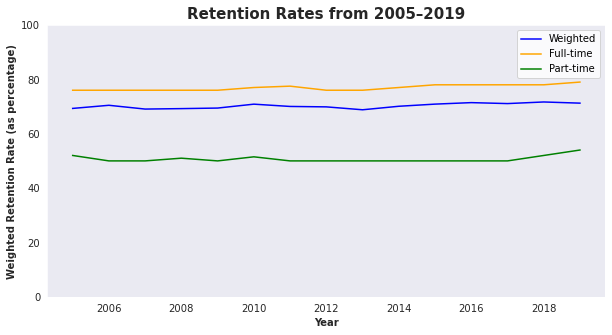

In [28]:
# Looking at retention rates.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Weighted Retention Rate'], x = trends.index, color='blue')
sns.lineplot(y = trends['Full-time Retention Rate'], x = trends.index, color='orange')
sns.lineplot(y = trends['Part-time Retention Rate'], x = trends.index, color='green')
ax.set_title('Retention Rates from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Weighted Retention Rate (as percentage)', fontsize=10,fontweight='bold')
ax.set_ylim(bottom=0,top=100)
ax.legend(labels = ['Weighted', 'Full-time', 'Part-time'])
plt.savefig('retention_rates.png');

We can see in this graph that despite the relatively stagnant retention rates, academic spending per FTE student and athletic spending per student athlete have both increased, the latter exponentially so.

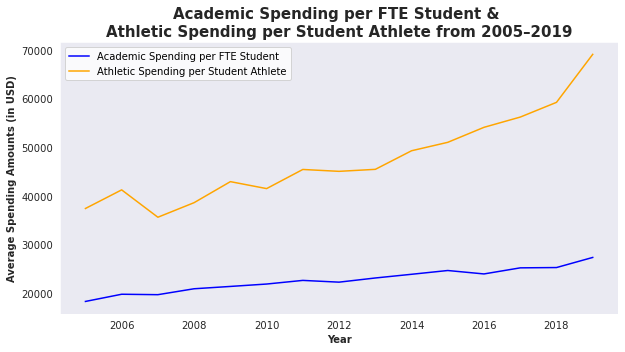

In [29]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Academic Spending per FTE Student'], x = trends.index, color='blue')
sns.lineplot(y = trends['Athletic Spending per Student Athlete'], x = trends.index, color='orange')
ax.set_title('Academic Spending per FTE Student & \nAthletic Spending per Student Athlete from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=10,fontweight='bold')
ax.legend(labels = ['Academic Spending per FTE Student', 'Athletic Spending per Student Athlete'])
plt.savefig('academic_athletic_spending.png');

This demonstrates that football coaching salaries have increased exponentially while average faculty salaries have been relatively stagnant.

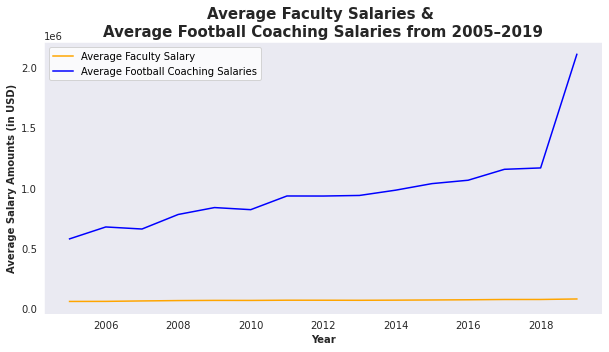

In [30]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Average Faculty Salary'], x = trends.index, color='orange')
sns.lineplot(y = trends['Total Football Coaching Salaries'], x = trends.index, color='blue')
ax.set_title('Average Faculty Salaries & \nAverage Football Coaching Salaries from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Average Salary Amounts (in USD)', fontsize=10,fontweight='bold')
ax.legend(labels = ['Average Faculty Salary', 'Average Football Coaching Salaries'])
plt.savefig('salaries.png');

We can also do similar trend analysis for each of the three NCAA subdivisions.

In [31]:
# Creating three separate dataframes, one for each NCAA subdivision.
fbs = df_time[df_time['NCAA Subdivision'] == 'Football Bowl Subdivision']
fcs = df_time[df_time['NCAA Subdivision'] == 'Football Championship Subdivision']
nfs = df_time[df_time['NCAA Subdivision'] == 'No Football Subdivision']

# Creating median trend dataframes for each NCAA subdivision.
fbs_trends = fbs.groupby('Survey Year').median()
fcs_trends = fcs.groupby('Survey Year').median()
nfs_trends = nfs.groupby('Survey Year').median()

Given that weighted retention rates are the target for this analysis, we can plot all three NCAA subdivisions to see their relative performance with this metric. The plot below demonstrates that the FBS has the best of the three, followed by the NFS, and finally the FCS.

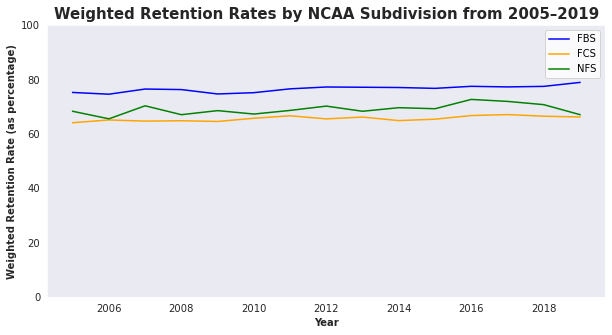

In [32]:
# Looking at weighted retention rates.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = fbs_trends['Weighted Retention Rate'], x = fbs_trends.index, color='blue')
sns.lineplot(y = fcs_trends['Weighted Retention Rate'], x = fcs_trends.index, color='orange')
sns.lineplot(y = nfs_trends['Weighted Retention Rate'], x = nfs_trends.index, color='green')
ax.set_title('Weighted Retention Rates by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Weighted Retention Rate (as percentage)', fontsize=10,fontweight='bold')
ax.set_ylim(bottom=0,top=100)
ax.legend(labels = ['FBS', 'FCS', 'NFS'])
plt.savefig('retention_rates_ncaa.png');

The line plot below demonstrates that the FBS spends a significantly greater amount per student athlete than both the FCS and NFS. This is not particularly surprising, given that the FBS is the most competitive athletics division of the NCAA. However, we can see that FCS schools tend to spend less than their FBS and NFS counterparts in both academics and athletics.

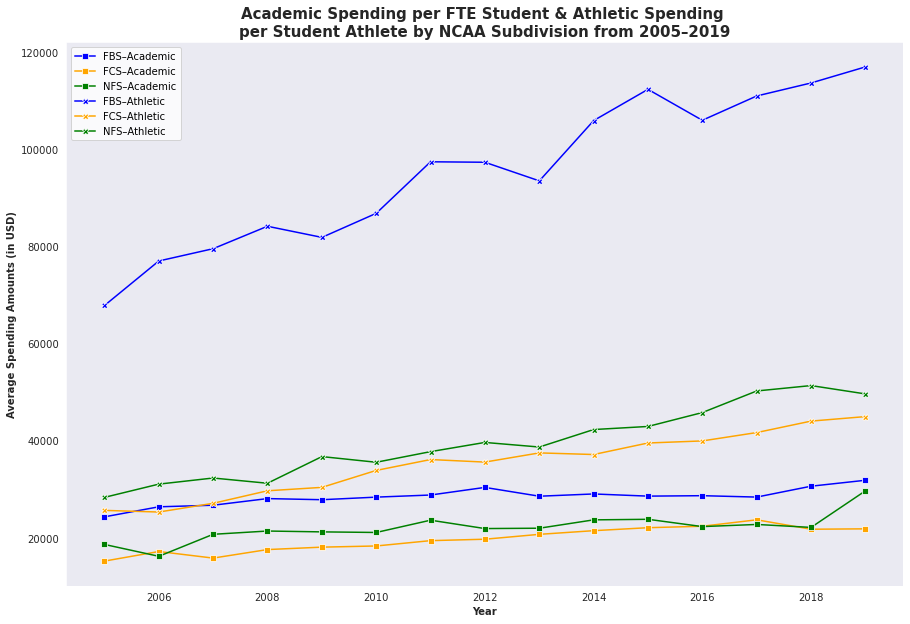

In [33]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(y = fbs_trends['Academic Spending per FTE Student'], x = fbs_trends.index, color='blue', marker = 's')
sns.lineplot(y = fcs_trends['Academic Spending per FTE Student'], x = fcs_trends.index, color='orange', marker = 's')
sns.lineplot(y = nfs_trends['Academic Spending per FTE Student'], x = nfs_trends.index, color='green', marker = 's')
sns.lineplot(y = fbs_trends['Athletic Spending per Student Athlete'], x = fbs_trends.index, color='blue', marker = 'X')
sns.lineplot(y = fcs_trends['Athletic Spending per Student Athlete'], x = fcs_trends.index, color='orange', marker = 'X')
sns.lineplot(y = nfs_trends['Athletic Spending per Student Athlete'], x = nfs_trends.index, color='green', marker = 'X')
ax.set_title('Academic Spending per FTE Student & Athletic Spending \nper Student Athlete by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=10,fontweight='bold')
ax.legend(labels = ['FBS–Academic', 'FCS–Academic', 'NFS–Academic','FBS–Athletic', 'FCS–Athletic', 'NFS–Athletic'])
plt.savefig('academic_athletic_spending_ncaa.png');

We can't do a similar football coach salary analysis like we did above given that the NFS does not have any data for this metric. However, we can plot average faculty salaries for each of the three NCAA subdivisions. Once again, we see that the FBS is at the top, followed by the NFS, and finally the FCS.

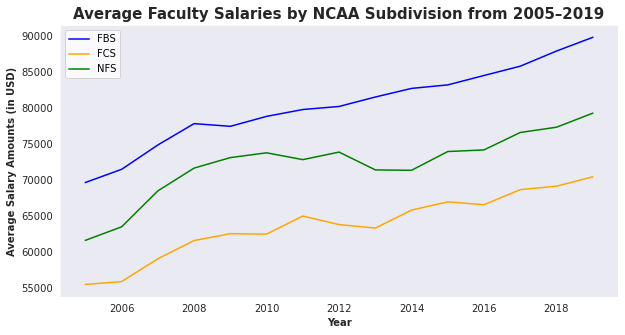

In [34]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = fbs_trends['Average Faculty Salary'], x = fbs_trends.index, color='blue')
sns.lineplot(y = fcs_trends['Average Faculty Salary'], x = fcs_trends.index, color='orange')
sns.lineplot(y = nfs_trends['Average Faculty Salary'], x = nfs_trends.index, color='green')
ax.set_title('Average Faculty Salaries by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=10,fontweight='bold')
ax.set_ylabel('Average Salary Amounts (in USD)', fontsize=10,fontweight='bold')
ax.legend(labels = ['FBS', 'FCS', 'NFS'])
plt.savefig('salaries_ncaa.png');

# Modeling and Evaluation

As discussed above, [based on NCES data](https://nces.ed.gov/programs/coe/indicator/ctr) (used in IPEDS variables), the average retention rate is 81% for all institutions including all acceptance rates. Thus, I will use this as the dividing point for creating a binned variable.

In [35]:
# Creating binned target variable based on median for logistic regression
df['WRR_Binned'] = np.where(df['Weighted Retention Rate']>81.0, 1.0, 0.0)

In [36]:
# Class imbalance in favor of schools that have less than average retention rates.
df['WRR_Binned'].value_counts(normalize=True)

0.0    0.780664
1.0    0.219336
Name: WRR_Binned, dtype: float64

Now I will create a train-test split for modeling purposes. The target will be the newly created binned weighted retention rate variable, which will be assigned to 'y'. On the other hand, 'X' will contain the other features used for modeling. There are several features created during the feature engineering section above that I wanted to keep for trend analysis, but now that we are moving on to modeling these will be dropped.

In [37]:
# Creating X (features) and y (target)
# Also dropping columns used in feature engineering.
X = df.drop(columns=['WRR_Binned', 'Weighted Retention Rate', 'Full-time Retention Rate', 'Part-time Retention Rate', 
                     'No. Full-Time Students Retained', 'No. Part-Time Students Retained', 'Total Enrollment', 
                     'Full-time Enrollment', 'Part-time Enrollment', 'Total Student Athletes', 'UNITID', 
                     'Institution Name'])
y = df['WRR_Binned']

# Creating a 10% holdout set for testing the final model
X_t, X_hold, y_t, y_hold = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

# Split into 70% train, 30% test sets (less than 3/4 to combat overfitting)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, random_state=42, stratify=y_t, test_size=20/90)

To make modeling more efficient, I will set up some pipelines. Thus, I will now group the remaining features based on data type.

In [38]:
# Categorical columns
cat_cols = ['NCAA Subdivision', 'FBS Conference', 'Survey Year']

In [39]:
# Numerical columns
num_cols = ['Grand Total Revenue', 'Grand Total Expenses', 'Other Expenses', 'Medical', 
            'Competition Guarantees (Expenses)', 'Recruiting', 'Game Expenses and Travel', 
            'Facilities and Equipment', 'Coaches Compensation', 'Support and Admin Compensation w/Severance',
            'Athletic Student Aid', 'Other Revenue', 'Corporate Sponsorship, Advertising, Licensing', 
            'Donor Contributions', 'Competition Guarantees (Revenues)', 
            'NCAA/Conference Distributions, Media Rights, and Post-Season Football', 'Ticket Sales', 
            'Institutional/Government Support', 'Student Fees', 
            'Total Institutional/Government Support and Student Fees', 'Total Academic Spending (University-Wide)', 
            'Total Football Spending', 'Total Football Coaching Salaries', 'Athletics Related Debt',
            'Annual Debt Service, Leases and Rental Fees on Athletic Facilities', 
            'Average Faculty Salary', 'Ratio of Athletic Spending vs. Academic Spending', 
            'Athletic Spending per Student Athlete', 'Academic Spending per FTE Student', 'Endowment']

In [40]:
# Categorical pipeline
cat_pipe = Pipeline([('ohe', OneHotEncoder())])

# Numeric pipeline
num_pipe = Pipeline([('min_max', MinMaxScaler())])

# Preprocessing pipeline, allow the untransformed columns to 'passthrough'
preprocessor = ColumnTransformer(transformers=[('categorical', cat_pipe, cat_cols),
                                               ('numerical', num_pipe, num_cols)],
                                 remainder='passthrough')

### Baseline Model

The predictor is set up to have 1.0 = schools with above average retention rates and 0.0 = below average retention rates.

True Positive: A school is identified as having above average retention rates and in fact does\
False Positive: A school is identified as having above average retention rates but in fact does not\
True Negative: A school is identified as having below average retention rates and in fact does\
False Negative: A school is identified as having below average retention rates but in fact does not

In this instance, I think false positives are more problematic than false negatives given that it is more of a problem to identify a school as above average when it is not. Thus, I will try and maximize precision scores throughout the modeling process.

Training Metrics
Accuracy: 0.665
Precision: 0.234
Recall: 0.232
f1: 0.233
----------
Testing Metrics
Accuracy: 0.692
Precision: 0.292
Recall: 0.286
f1: 0.289


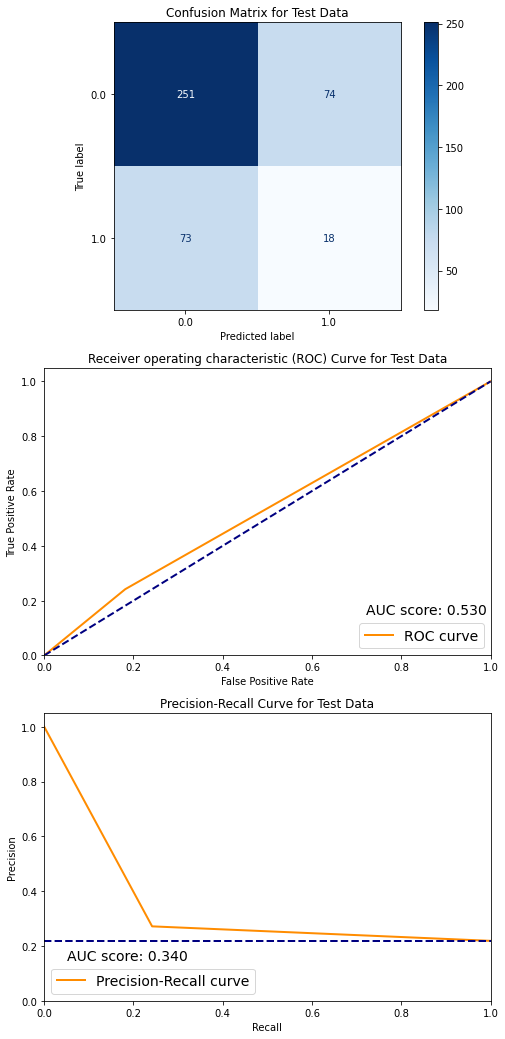

In [41]:
baseline = DummyClassifier(strategy='stratified')

# The results of this evaluation are not great, but this is also not unexpected for a baseline
evaluate(baseline, X_train, y_train, X_test, y_test)

### Logistic Regression

In [42]:
# Logistic regression pipeline
logr_pipe = Pipeline([('preprocessor', preprocessor),
                   ('logr', LogisticRegression(class_weight='balanced', random_state=42))])

# Scoring metrics to be used throughout modeling process
scoring_metrics = ('recall', 'precision', 'f1')

# Cross validation
logr_cv = cross_validate(logr_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(logr_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(logr_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(logr_cv['test_f1']):.3f}")

Mean Validation Recall: 0.805
Mean Validation Precision: 0.653
Mean Validation f1: 0.719


Training Metrics
Accuracy: 0.871
Precision: 0.662
Recall: 0.840
f1: 0.740
----------
Testing Metrics
Accuracy: 0.870
Precision: 0.695
Recall: 0.725
f1: 0.710


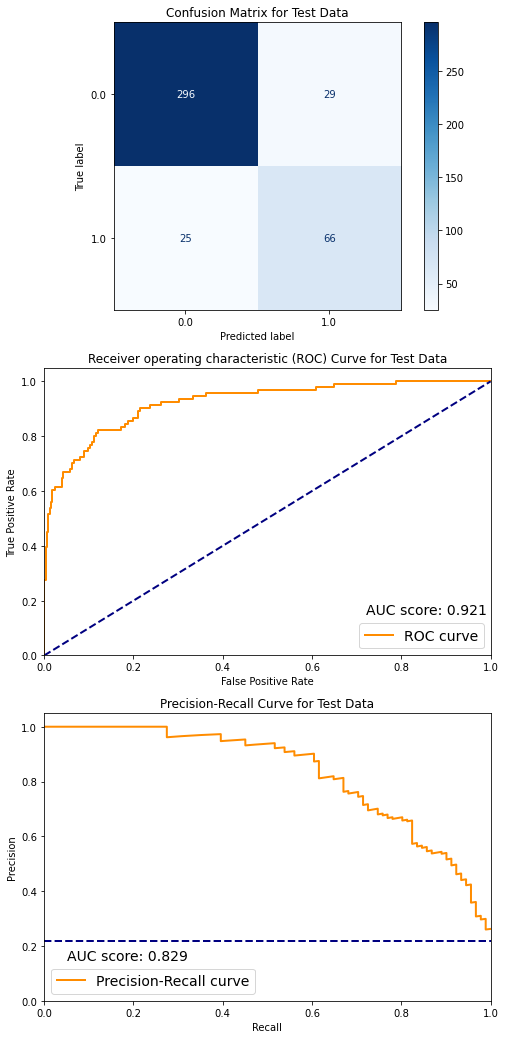

In [43]:
# Better than baseline, but recall scores are higher than precision which conflicts with the goals of this project.
evaluate(logr_pipe, X_train, y_train, X_test, y_test)

### KNN

In [44]:
# knn pipeline
knn_pipe = Pipeline([('preprocessor', preprocessor),
                   ('knn', KNeighborsClassifier())])

# cross validation
knn_cv = cross_validate(knn_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(knn_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(knn_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(knn_cv['test_f1']):.3f}")

Mean Validation Recall: 0.533
Mean Validation Precision: 0.800
Mean Validation f1: 0.638


Training Metrics
Accuracy: 0.893
Precision: 0.847
Recall: 0.627
f1: 0.721
----------
Testing Metrics
Accuracy: 0.873
Precision: 0.852
Recall: 0.505
f1: 0.634


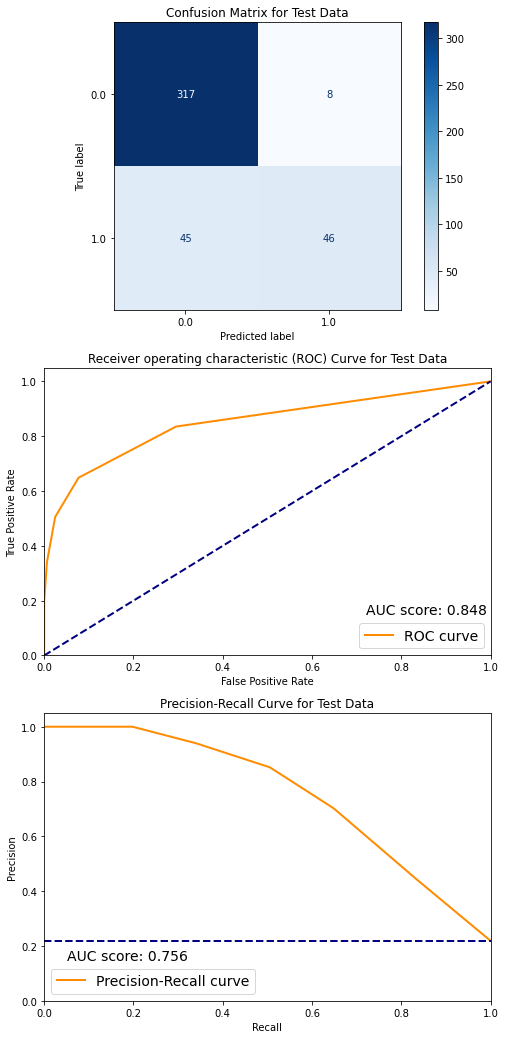

In [45]:
# Slightly overfit, but overall not too bad.
# Precision higher than recall which is what we are looking for.
evaluate(knn_pipe, X_train, y_train, X_test, y_test)

### Decision Tree

In [46]:
# Decision tree pipeline
dt_pipe = Pipeline([('preprocessor', preprocessor),
                   ('dt', DecisionTreeClassifier(random_state=42))])

# Cross validation
dt_cv = cross_validate(dt_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(dt_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(dt_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(dt_cv['test_f1']):.3f}")

Mean Validation Recall: 0.702
Mean Validation Precision: 0.749
Mean Validation f1: 0.724


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.882
Precision: 0.739
Recall: 0.714
f1: 0.726


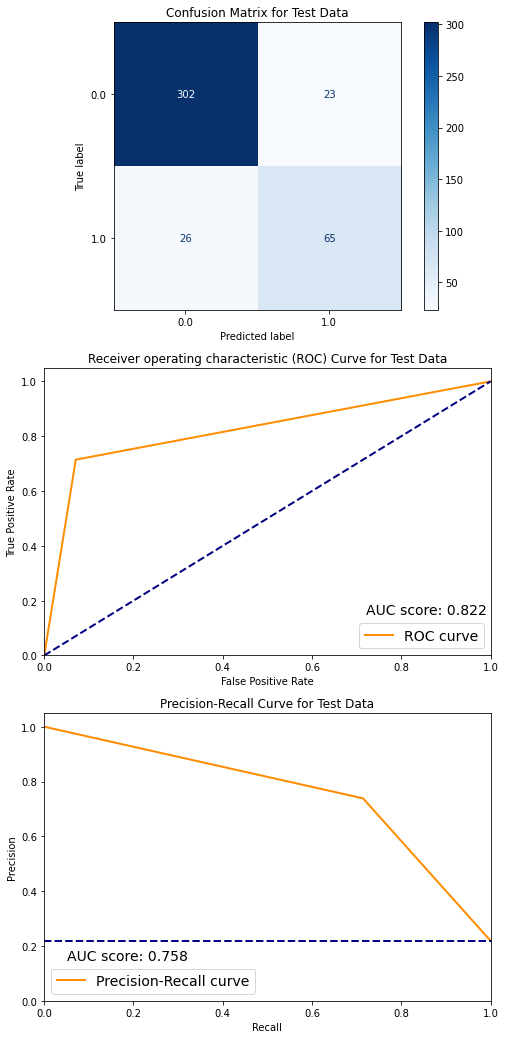

In [47]:
# Signs of overfitting, which is not surprising for a decision tree
evaluate(dt_pipe, X_train, y_train, X_test, y_test)

### Decision Tree Grid Search

In [48]:
# decision tree param grid
dt_grid = {'dt__max_depth': [3, 4, 5, 10],
          'dt__min_samples_leaf': [2, 5, 10, 20],
          'dt__criterion': ['gini', 'entropy'],
          'dt__class_weight': [None, 'balanced']}

dt_gs = GridSearchCV(estimator=dt_pipe, param_grid=dt_grid, scoring=scoring_metrics, refit='f1')

Training Metrics
Accuracy: 0.985
Precision: 0.990
Recall: 0.940
f1: 0.965
----------
Testing Metrics
Accuracy: 0.899
Precision: 0.810
Recall: 0.703
f1: 0.753

Best Parameters
{'dt__class_weight': None, 'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__class_weight,param_dt__criterion,param_dt__max_depth,param_dt__min_samples_leaf,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
12,0.025283,0.001554,0.006564,0.000387,None,gini,10,2,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.666667,...,0.019480,4,0.724138,0.737705,0.715447,0.753846,0.711864,0.728600,0.015448,1
28,0.026650,0.000968,0.006668,0.000414,None,entropy,10,2,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.698413,...,0.044422,8,0.721311,0.712121,0.776119,0.693548,0.730435,0.726707,0.027557,2
45,0.022459,0.000525,0.006298,0.000273,balanced,gini,10,5,"{'dt__class_weight': 'balanced', 'dt__criterio...",0.761905,...,0.028601,36,0.711111,0.741259,0.773723,0.705036,0.686131,0.723452,0.030752,3
44,0.023204,0.000271,0.006039,0.000090,balanced,gini,10,2,"{'dt__class_weight': 'balanced', 'dt__criterio...",0.682540,...,0.030959,32,0.656489,0.732824,0.744828,0.706767,0.723077,0.712797,0.030789,4
29,0.025828,0.001317,0.006631,0.000269,None,entropy,10,5,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.666667,...,0.056808,14,0.724138,0.681818,0.759690,0.651163,0.725806,0.708523,0.037852,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.018619,0.000264,0.007017,0.000668,None,gini,4,10,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.587302,...,0.057107,12,0.649123,0.615385,0.660714,0.634921,0.650407,0.642110,0.015685,60
23,0.021893,0.000732,0.006708,0.000359,None,entropy,4,20,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.698413,...,0.038491,34,0.704000,0.590164,0.692913,0.617886,0.600000,0.640993,0.047882,61
2,0.017070,0.000802,0.006809,0.000172,None,gini,3,10,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.571429,...,0.055342,5,0.648649,0.622642,0.648649,0.593220,0.684685,0.639569,0.030447,62
0,0.017777,0.000911,0.007356,0.000436,None,gini,3,2,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.571429,...,0.073290,1,0.642857,0.622642,0.684211,0.601770,0.632653,0.636826,0.027310,63


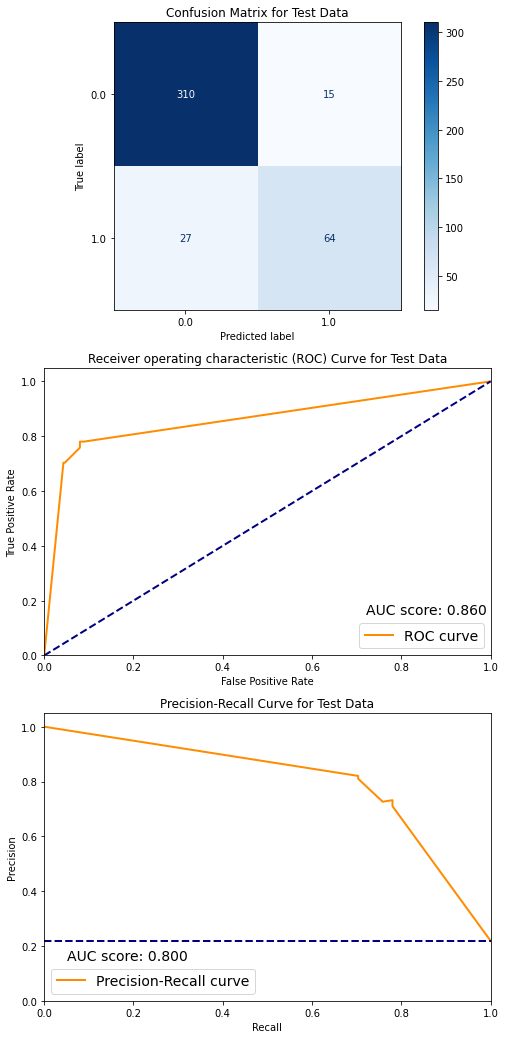

In [49]:
# Still overfit, but somewhat improved
dt_gs_model = evaluate(dt_gs, X_train, y_train, X_test, y_test, grid_search=True)

### Gradient Boost

In [50]:
# gradient boosting pipeline
gb_pipe = Pipeline([('preprocessor', preprocessor),
                   ('gb', GradientBoostingClassifier(learning_rate=0.01,
                                                     max_depth=10,
                                                     min_samples_leaf=10,
                                                     n_estimators=1000,
                                                     random_state=42))])

# cross validation
gb_cv = cross_validate(gb_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(gb_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(gb_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(gb_cv['test_f1']):.3f}")

Mean Validation Recall: 0.777
Mean Validation Precision: 0.903
Mean Validation f1: 0.834


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.938
Precision: 0.911
Recall: 0.791
f1: 0.847


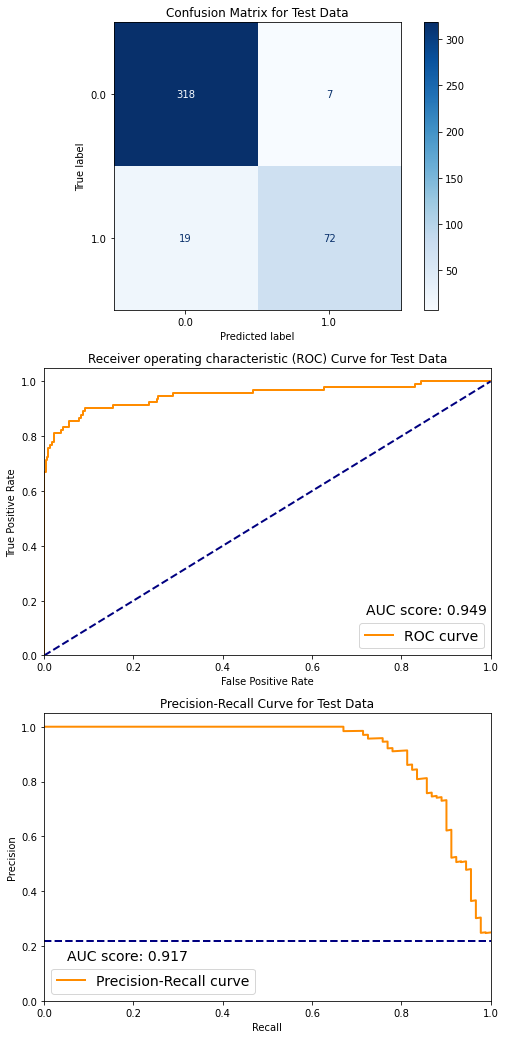

In [51]:
# Precision is higher than recall, but this seems to be rather overfit.
evaluate(gb_pipe, X_train, y_train, X_test, y_test)

### Random Forest

In [52]:
# Decision tree pipeline
rf_pipe = Pipeline([('preprocessor', preprocessor),
                   ('rf', RandomForestClassifier(random_state=42))])

# Cross validation
rf_cv = cross_validate(rf_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(rf_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(rf_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(rf_cv['test_f1']):.3f}")

Mean Validation Recall: 0.743
Mean Validation Precision: 0.885
Mean Validation f1: 0.807


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.930
Precision: 0.919
Recall: 0.747
f1: 0.824


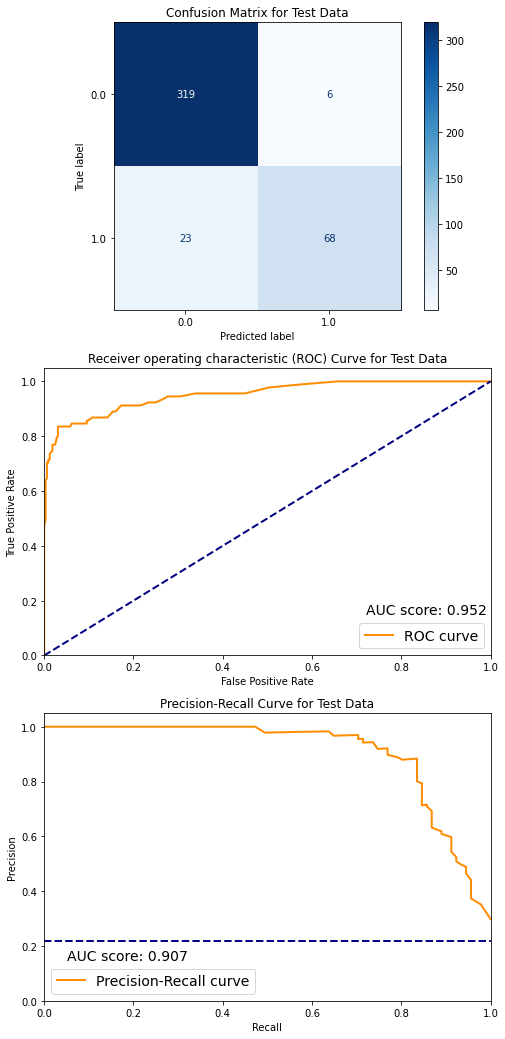

In [53]:
# Still overfit, but performing better than the original decision trees.
evaluate(rf_pipe, X_train, y_train, X_test, y_test)

### Random Forest Grid Search

In [54]:
rf_grid = {
    'rf__min_samples_split': [3, 5, 10], 
    'rf__n_estimators' : [100, 300],
    'rf__max_depth': [3, 5, 15, 25],
    'rf__max_features': [3, 5, 10, 20]
}

rf_gs = GridSearchCV(estimator=rf_pipe, param_grid=rf_grid, scoring=scoring_metrics, refit='f1')

Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.942
Precision: 0.947
Recall: 0.780
f1: 0.855

Best Parameters
{'rf__max_depth': 25, 'rf__max_features': 10, 'rf__min_samples_split': 3, 'rf__n_estimators': 300}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
85,0.965810,0.024961,0.035450,0.001283,25,10,3,300,"{'rf__max_depth': 25, 'rf__max_features': 10, ...",0.698413,...,0.019730,1,0.792793,0.796610,0.847458,0.890625,0.830508,0.831599,0.035964,1
61,0.853605,0.007129,0.031276,0.000732,15,10,3,300,"{'rf__max_depth': 15, 'rf__max_features': 10, ...",0.682540,...,0.016030,2,0.781818,0.796610,0.840336,0.890625,0.820513,0.825980,0.038021,2
66,0.479058,0.015640,0.015305,0.000726,15,20,3,100,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.698413,...,0.030089,4,0.792793,0.796610,0.864407,0.875000,0.796610,0.825084,0.036612,3
91,1.527180,0.046168,0.034863,0.002210,25,20,3,300,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.698413,...,0.027359,13,0.792793,0.806723,0.850000,0.875000,0.793388,0.823581,0.033123,4
92,0.506209,0.024528,0.015708,0.000966,25,20,5,100,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.682540,...,0.023542,5,0.781818,0.813559,0.827586,0.883721,0.809917,0.823320,0.033656,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.411477,0.001113,0.027792,0.000344,3,5,5,300,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.053011,86,0.629630,0.603774,0.560748,0.518519,0.520833,0.566701,0.044261,91
4,0.127772,0.003222,0.013896,0.000981,3,3,10,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.539683,...,0.056105,92,0.641509,0.603774,0.560748,0.504673,0.520000,0.566141,0.051055,93
8,0.142644,0.001272,0.013401,0.000220,3,5,5,100,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.061512,89,0.635514,0.616822,0.555556,0.513761,0.505263,0.565383,0.052802,94
6,0.141774,0.001166,0.013641,0.000251,3,5,3,100,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.061512,89,0.635514,0.616822,0.555556,0.513761,0.505263,0.565383,0.052802,94


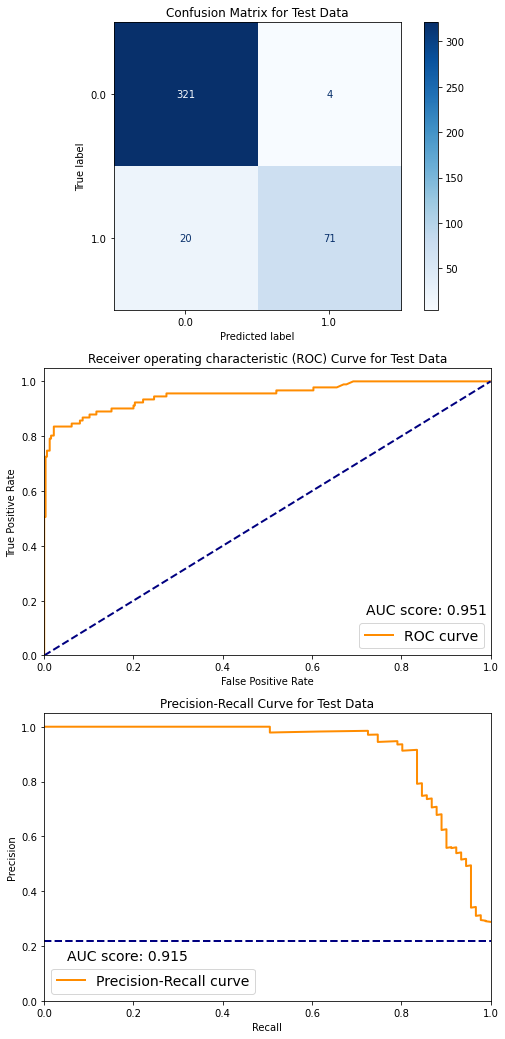

In [55]:
# Still overfit, but improved from RF model above.
rf_gs_model = evaluate(rf_gs, X_train, y_train, X_test, y_test, grid_search=True)

I also experiemtned with different types of stacked models, but opted not to include these results in the final notebook given that the results were not significantly better than any of the individual model types above. If you are interested in the results of these models, you can find those results in the EDA Notebooks folder in this repository.

### Final Model

Given that I am trying to maximize precision, I opted to select the random forest grid search model as my final model. While there are some signs of overfitting, I think the cross validation scores—in particular the precision score of .885—indicate that this model will still perform reasonably well against unseen data. The precision score on the testing data was .947, so the last step was to test this model on the holdout data. The precision score on the holdout test was .814 which was lower than expected, but perhaps not that unsurprising given that the model does seem to be overfit on the training data. 

Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.909
Precision: 0.814
Recall: 0.761
f1: 0.787

Best Parameters
{'rf__max_depth': 25, 'rf__max_features': 10, 'rf__min_samples_split': 3, 'rf__n_estimators': 300}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
85,0.960976,0.018003,0.035715,0.002505,25,10,3,300,"{'rf__max_depth': 25, 'rf__max_features': 10, ...",0.698413,...,0.019730,1,0.792793,0.796610,0.847458,0.890625,0.830508,0.831599,0.035964,1
61,0.863066,0.018243,0.031686,0.001096,15,10,3,300,"{'rf__max_depth': 15, 'rf__max_features': 10, ...",0.682540,...,0.016030,2,0.781818,0.796610,0.840336,0.890625,0.820513,0.825980,0.038021,2
66,0.475772,0.005154,0.015241,0.000316,15,20,3,100,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.698413,...,0.030089,4,0.792793,0.796610,0.864407,0.875000,0.796610,0.825084,0.036612,3
91,1.479728,0.051460,0.032279,0.001003,25,20,3,300,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.698413,...,0.027359,13,0.792793,0.806723,0.850000,0.875000,0.793388,0.823581,0.033123,4
92,0.489109,0.016748,0.016906,0.001766,25,20,5,100,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.682540,...,0.023542,5,0.781818,0.813559,0.827586,0.883721,0.809917,0.823320,0.033656,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.443910,0.006544,0.030695,0.000863,3,5,5,300,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.053011,86,0.629630,0.603774,0.560748,0.518519,0.520833,0.566701,0.044261,91
4,0.140497,0.005504,0.014695,0.000509,3,3,10,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.539683,...,0.056105,92,0.641509,0.603774,0.560748,0.504673,0.520000,0.566141,0.051055,93
8,0.152240,0.001773,0.014806,0.000338,3,5,5,100,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.061512,89,0.635514,0.616822,0.555556,0.513761,0.505263,0.565383,0.052802,94
6,0.158927,0.009579,0.017262,0.005559,3,5,3,100,"{'rf__max_depth': 3, 'rf__max_features': 5, 'r...",0.539683,...,0.061512,89,0.635514,0.616822,0.555556,0.513761,0.505263,0.565383,0.052802,94


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['NCAA '
                                                                          'Subdivision',
                                                                          'FBS '
                                                                          'Conference',
                                                                          'Survey '
                                                                          'Year']),
                                                          

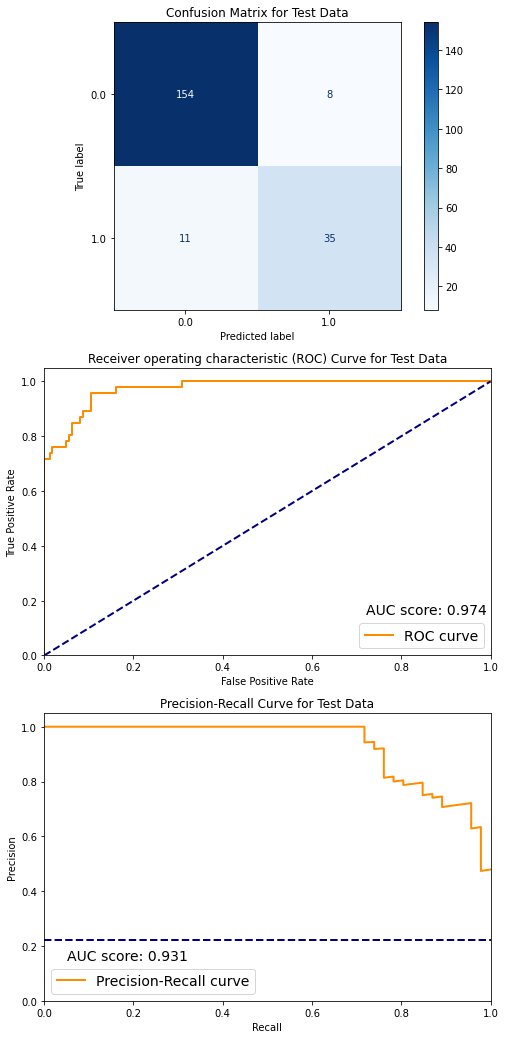

In [56]:
evaluate(rf_gs, X_train, y_train, X_hold, y_hold, grid_search=True)

### Feature Importance

Now that I have evaluated the final model, it is time to determine the relative feature importances. As we can see, the most significant features in this model are "Average Faculty Salary" and 'Total Academic Spending (University-Wide)', which account for 13.5% and 8.8% of the value of features in this model, respectively. 

In [57]:
# Creating an array of feature importance values for the random forest
feature_importance_values = rf_gs_model.best_estimator_[1].feature_importances_

# Retrieving feature names from OHE features
ohe_cols = rf_gs_model.best_estimator_['preprocessor'].transformers_[0][1]['ohe'].get_feature_names()

# Preprocessor features are in order of the pipeline steps
feature_cols = [*ohe_cols, *num_cols]

# create DataFrame with feature names and importance
feature_df = pd.DataFrame.from_dict(dict(zip(feature_cols, feature_importance_values)),
                                    orient='index',
                                    columns=['feature importance'])

In [58]:
# Sorting features based on importance
sorted_features = feature_df.sort_values('feature importance', ascending=False).head(10)

In [59]:
sorted_features

,feature importance
Average Faculty Salary,0.134682
Total Academic Spending (University-Wide),0.088399
Grand Total Expenses,0.040291
Support and Admin Compensation w/Severance,0.040124
Total Football Spending,0.040008
Academic Spending per FTE Student,0.037906
Grand Total Revenue,0.037707
Ticket Sales,0.037060
"NCAA/Conference Distributions, Media Rights, and Post-Season Football",0.033855
Endowment,0.031826


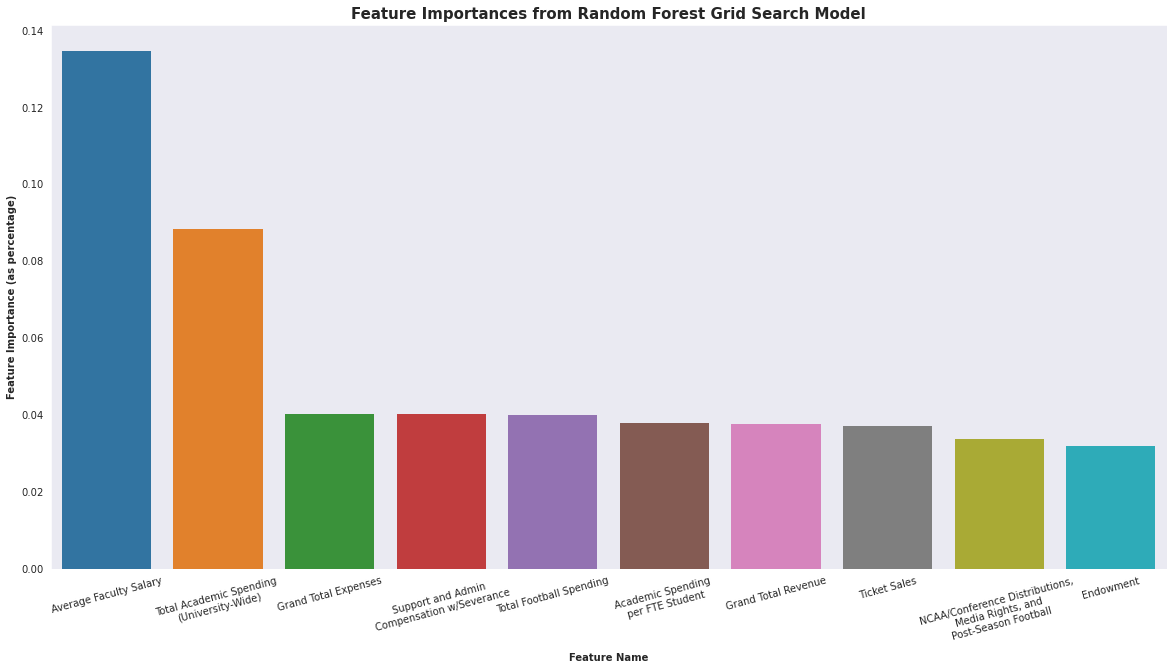

In [60]:
# Creating a bar graph to visualize relative feature importances
labels = ['Average Faculty Salary', 'Total Academic Spending\n(University-Wide)', 'Grand Total Expenses',
          'Support and Admin\nCompensation w/Severance', 'Total Football Spending', 
          'Academic Spending\nper FTE Student', 'Grand Total Revenue', 'Ticket Sales', 
          'NCAA/Conference Distributions,\nMedia Rights, and\nPost-Season Football', 'Endowment']

with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = sorted_features['feature importance'], x = sorted_features.index)
ax.set_title('Feature Importances from Random Forest Grid Search Model', fontsize=15,fontweight='bold')
ax.set_xlabel('Feature Name', fontsize=10,fontweight='bold')
ax.set_ylabel('Feature Importance (as percentage)', fontsize=10,fontweight='bold')
ax.set_xticklabels(labels = labels, rotation = 15)
plt.savefig('feature_importances.png');

Here is a list of these ten features, including the source of the data and a brief definition of what the data represents.

- Average Faculty Salary: 
    - IPEDS
    - Average of all faculty salaries at a given institution
- Total Academic Spending (University-Wide): 
    - Knight Commission
    - Total expenditures for the direct role and mission activities of an institution. It includes functional classifications of expenditures for instruction, research, public service, academic support, student services, institutional support, scholarships and fellowships, and operations and maintenance.
- Grand Total Expenses:
    - EADA
    - All expenses attributable to intercollegiate athletic activities. This includes appearance guarantees and options, athletically related student aid, contract services, equipment, fundraising activities, operating expenses, promotional activities, recruiting expenses, salaries and benefits, supplies, travel, and any other expenses attributable to intercollegiate athletic activities.
- Support and Admin Compensation w/ Severance:
    - Knight Commission
    - Support and administrative staff compensation includes bonuses and benefits paid to all administrative and support staff. This category includes direct payment from the institution and payment from a third party. Severance payments for former coaches and administrators are also included.
- Total Football Spending:
    - Knight Commission
    - Total football operating expenses, including the cost of athletics student aid.
- Academic Spending per FTE Student:
    - Feature Engineered Column
    - Total Academic Spending/Total number of enrolled students
- Grand Total Revenue:
    - EADA
    - All revenues attributable to intercollegiate athletic activities. This includes revenues from appearance guarantees and options, contributions from alumni and others, institutional royalties, signage and other sponsorships, sport camps, state or other government support, student activity fees, ticket and luxury box sales, and any other revenues attributable to intercollegiate athletic activities.
- Ticket Sales:
    - Knight Commission
    - Revenue received from ticket sales for all NCAA-sponsored sports at an institution.
- NCAA/Conference Distributions, Media Rights, and Post-Season Football
    - Knight Commission
    - Revenue received from the NCAA (including championships) and athletics conferences, media rights, and post-season football bowl games.
- Endowment:
    - IPEDS
    - Total size of endowment at the end of the fiscal year

Of these top 10 feature importances, we can see that 4 of them are more related to academic spending and 6 are more related to athletic spending:
<br>
<br>
**Academic:** 'Average Faculty Salary', 'Total Academic Spending (University-Wide)', 'Academic Spending per FTE Student', 'Endowment'.
<br>
**Athletic:** 'Grand Total Expenses', 'Support and Admin Compensation w/ Severance', 'Total Football Spending', 'Grand Total Revenue', 'Ticket Sales', 'NCAA/Conference Distributions, Media Rights, and Post-Season Football'.
<br>
<br>
If we then add up the relative feature importances provided by the code above, we can see that the total importance of the academic features outweighs the athletic features, even though there are two fewer in this list:
<br>
<br>
**Academic** = 0.292813
<br>
**Athletic** = 0.229045
<br>
<br>
This suggests that academic spending is more important to student retention rates than athletic spending. However, if we examine the metrics below, we can see that universities have been increasing athletic spending at a greater rate than academic spending over the course of the 15 years included in this data:

In [61]:
print(f"Median Faculty Salary:        ${df['Average Faculty Salary'].median()}")
print(f"Median Football Coach Salary: ${df['Total Football Coaching Salaries'].median()}")
print(" ")
print(f"Faculty Salary Rate of Increase from 2005–2019:  {round(((trends['Average Faculty Salary'][-1] - trends['Average Faculty Salary'][0])/trends['Average Faculty Salary'][0])*100,1)}%")
print(f"Coaching Salary Rate of Increase from 2005–2019: {round(((trends['Total Football Coaching Salaries'][-1] - trends['Total Football Coaching Salaries'][0])/trends['Total Football Coaching Salaries'][0])*100,1)}%")

Median Faculty Salary:        $71460.0
Median Football Coach Salary: $978101.0
 
Faculty Salary Rate of Increase from 2005–2019:  33.6%
Coaching Salary Rate of Increase from 2005–2019: 263.8%


In [62]:
print(f"Academic Spending per FTE Student Rate of Increase from 2005–2019:     {round(((trends['Academic Spending per FTE Student'][-1] - trends['Academic Spending per FTE Student'][0])/trends['Academic Spending per FTE Student'][0])*100,1)}%")
print(f"Athletic Spending per Student Athlete Rate of Increase from 2005–2019: {round(((trends['Athletic Spending per Student Athlete'][-1] - trends['Athletic Spending per Student Athlete'][0])/trends['Athletic Spending per Student Athlete'][0])*100,1)}%")

Academic Spending per FTE Student Rate of Increase from 2005–2019:     49.5%
Athletic Spending per Student Athlete Rate of Increase from 2005–2019: 84.8%


In [63]:
print(f"Academic Spending Rate of Increase from 2005–2019: {round(((trends['Total Academic Spending (University-Wide)'][-1] - trends['Total Academic Spending (University-Wide)'][0])/trends['Total Academic Spending (University-Wide)'][0])*100,1)}%")
print(f"Athletic Spending Rate of Increase from 2005–2019: {round(((trends['Grand Total Expenses'][-1] - trends['Grand Total Expenses'][0])/trends['Grand Total Expenses'][0])*100,1)}%")

Academic Spending Rate of Increase from 2005–2019: 72.5%
Athletic Spending Rate of Increase from 2005–2019: 131.5%


### Looking at predictions to determine NCAA Subdivison information

In [64]:
# Creating a dataframe of the predictions from the random forest model
df_preds = pd.DataFrame(rf_gs_model.predict(df), index=df.index, columns=['prediction'])

# create DataFrame to inspect predictions
df_preds = pd.concat([df.loc[df.index, ['UNITID', 'Institution Name', 'Survey Year', 'FBS Conference', 
                                        'NCAA Subdivision', 'Average Faculty Salary', 
                                        'Academic Spending per FTE Student', 
                                        'Athletic Spending per Student Athlete']], df_preds], axis=1)

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [65]:
# Splitting the prediction df into above and below average retention rates to get more specific school/conference info
above_average_preds = df_preds[df_preds['prediction']==1.0]
below_average_preds = df_preds[df_preds['prediction']==0.0]

Based on the random forest model predictions, we can see that the FBS has the most representation in the "above average predictions", while the FCS has the most representation in the "below average predictions".

In [66]:
above_average_preds['NCAA Subdivision'].value_counts(normalize=True)

Football Bowl Subdivision            0.681922
No Football Subdivision              0.173913
Football Championship Subdivision    0.144165
Name: NCAA Subdivision, dtype: float64

In [67]:
below_average_preds['NCAA Subdivision'].value_counts(normalize=True)

Football Championship Subdivision    0.464677
Football Bowl Subdivision            0.334348
No Football Subdivision              0.200974
Name: NCAA Subdivision, dtype: float64

If we just want to focus on which FBS conferences do the best, we will have to temporarily ignore the 'N/A' values given that these represent schools not in the FBS. As we can see, the so-called "power 5 conferences" (Big 10, ACC, SEC, PAC-12, and Big 12) are all at the top of the above average predictions. On the other hand, 4 of the so-called "group of 5 conferences" (C-USA, MW, Sun Belt, and MAC) are at the top of the below average predictions.

In [68]:
above_average_preds['FBS Conference'].value_counts(normalize=True)

N/A                             0.318078
Big Ten Conference              0.151030
Atlantic Coast Conference       0.141876
Southeastern Conference         0.114416
Pacific-12 Conference           0.082380
Big 12 Conference               0.061785
American Athletic Conference    0.032037
Mountain West Conference        0.032037
Conference USA                  0.025172
Big East Conference             0.022883
Western Athletic Conference     0.009153
Sun Belt Conference             0.006865
Mid-American Conference         0.002288
Name: FBS Conference, dtype: float64

In [69]:
below_average_preds['FBS Conference'].value_counts(normalize=True)

N/A                             0.665652
Conference USA                  0.073691
Mountain West Conference        0.045067
Sun Belt Conference             0.043849
Mid-American Conference         0.038368
Western Athletic Conference     0.029233
Big 12 Conference               0.026797
Southeastern Conference         0.026797
Pacific-12 Conference           0.021924
American Athletic Conference    0.009744
Big East Conference             0.007917
Atlantic Coast Conference       0.007308
Big Ten Conference              0.003654
Name: FBS Conference, dtype: float64

We can also see that these schools predicted to be below average have a lower median faculty salary than their above average counterparts:

In [70]:
print(f"Above Average Schools Average Faculty Salary: ${above_average_preds['Average Faculty Salary'].median()}")
print(f"Below Average Schools Average Faculty Salary: ${below_average_preds['Average Faculty Salary'].median()}")

Above Average Schools Average Faculty Salary: $90994.0
Below Average Schools Average Faculty Salary: $68247.0


Given that schools have a large variance in overall budget size, using an average like academic spending per FTE student will be a more reliable metric for comparing above and below average schools than total academic spending (university-wide). As we can see, above average schools spend more on academics per FTE student:

In [71]:
print(f"Above Average Schools Academic Spending per FTE Student: ${above_average_preds['Academic Spending per FTE Student'].median()}")
print(f"Below Average Schools Academic Spending per FTE Student: ${below_average_preds['Academic Spending per FTE Student'].median()}")

Above Average Schools Academic Spending per FTE Student: $34601.78
Below Average Schools Academic Spending per FTE Student: $21677.75


However, we can also see that above average schools tend to spend more money on student athletes as well. This likely has something to do with a correlation between all spending metrics and overall budget size, and as might be apparent, the more money a school has the better they often are at retaining students.

In [72]:
print(f"Above Average Schools Athletic Spending per Student Athlete: ${above_average_preds['Athletic Spending per Student Athlete'].median()}")
print(f"Below Average Schools Athletic Spending per Student Athlete: ${below_average_preds['Athletic Spending per Student Athlete'].median()}")

Above Average Schools Athletic Spending per Student Athlete: $101498.42
Below Average Schools Athletic Spending per Student Athlete: $44357.61


# Conclusions

- As seen in the feature importances from the random forest model, academic spending metrics are more important to student retention rates. Thus, we might generalize these results to say that universities interested in increasing retention rates should consider spending more on academic units.
    - In particular, average faculty salaries are the most important feature according to the random forest model. However, average faculty salaries are significantly lower than average football coaching salaries (\\$71,460 vs. \\$978,101), and have been increasing at a significantly lower rate from 2005–2019 (33.6% vs. 263.8%). 
    - We can also see that the rates of increase for academic spending per FTE student vs. athletic spending per student athlete have been similarly tilted from 2005–2019 in favor of athletic spending (49.5% vs. 84.8%). 
    - The same is true for total academic spending vs. total athletic spending from 2005–2019 (72.5% vs. 131.5%). 
    - Thus, it might be beneficial for universities interested in increasing retention rates to find more of a balance between faculty salaries and football coaching salaries by either paying faculty more and/or paying football coaches less.
- Based on the predictions from the random forest model, I was able to determine that FBS schools are likely to have better retention rates than their FCS and NFS counterparts. Furthermore, within the FBS, schools in the power 5 conferences seem to have a greater likelihood of having above average retention rates than others. Thus, one general comment regarding these results might be that the results of this model are more relevant to schools outside of the FBS power 5.
    - However, one possible reason for this could be that schools in the FBS power 5 conferences tend to have larger budgets than other schools, and thus are able to spend enough money on academics and athletics to be able to maintain above average retention rates and quality athletics programs. Thus, one possible approach would be for colleges to spend less on their athletics departments since they will not make money from them anyway, and redirect that spending towards academic departments which could have a positive impact on student retention rates.

# Limitations

- This data set only includes 166 institutions, there are about 4000 total in the US. The NCAA includes about 1100 institutions. Thus, this is study includes only a small subset of schools in the US.
- For athletic spending this study focused primarily on football programs, but other sports could impact model performance (especially basketball given the revenue generated from March Madness).
- This study includes only 15 years worth of data. While this is useful for getting a sense of some trends, it might not be enough to clearly detect long-term trends or do accurate time series forecasting, which would likely be useful for programs making decisions about future spending practices.

# Future Directions

- Given that there are many more colleges in the US, I think it would be useful to repeat a similar study but with more institutions.
- There are potentially thousands of specific financial metrics that could be included in future studies. These were eliminated for this study to avoid building an overly complex model, but here are some thoughts regarding other features that could be included in the future:
    - Athletics
        - Basketball, baseball, hockey, and track & field represent some of the other major college sports that could be included in future studies.
        - Coaching salaries and other expenditures for other sports could also be included. 
        - Other finances related to TV deals would be useful to include as well, to the extent that they are available.
    - Academics
        - Including information pertaining to grants received might be another useful metric.
        - Perhaps the number of tenured vs. untenured faculty would be a useful indicator of student retention.
            - Similarly, the number of full-time vs. part-time (or adjunct) faculty could be useful.
        - Including tuition costs and scholarships might also be useful information for future iterations of this model.
- I would also be interested in examining the relationship between student retention rates and other student success metrics such as : 
    - Student loan repayment 
    - Student earnings after graduation
    - Graduation rates
    - Student grades (this data would be difficult, maybe impossible to obtain given that it is not public. However, if I was somehow able to gain access to this data, it would be interesting to study this relationship).